In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"


/home/mshaikh2/anaconda3/envs/tf-gpu-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mshaikh2/anaconda3/envs/tf-gpu-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mshaikh2/anaconda3/envs/tf-gpu-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mshaikh2/anaconda3/envs/tf-g

In [2]:
#download the CIFAR 100 datasets 
(x_train,y_train),(x_test,y_test)=datasets.cifar100.load_data()

#normalize the data
x_train,x_test=x_train/255.0,x_test/255.0

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [4]:
x_train.shape


(40000, 32, 32, 3)

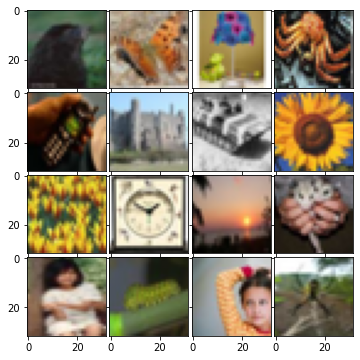

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.05,  # pad between axes in inch.
         )

for ax, im in zip(grid, x_train[:16]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [6]:
from keras.utils import  to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

Using TensorFlow backend.


In [7]:
## VGG16  with the sgd and no regularization
import keras,os
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Activation
from keras.preprocessing.image import ImageDataGenerator
import numpy as np



model=Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model.add(Activation('elu'))
model.add(MaxPool2D(strides=2))
model.add(Activation('elu'))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
model.add(Activation('elu'))
model.add(MaxPool2D(strides=2))
model.add(Activation('elu'))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
model.add(Activation('elu'))
model.add(MaxPool2D(strides=2))
model.add(Activation('elu'))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same"))
model.add(Activation('elu'))
model.add(MaxPool2D(strides=2))
model.add(Activation('elu'))


model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same"))
model.add(Activation('elu'))
model.add(MaxPool2D(strides=2))
model.add(Activation('elu'))

model.add(Flatten())
model.add(Dense(units=2048))
model.add(Activation('elu'))
model.add(Dense(units=100,activation="softmax"))



In [8]:
from keras.optimizers import  SGD

model.compile(optimizer=SGD(lr=0.0005),loss='categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)      

In [9]:
#early stopping
from keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1,mode='auto')

In [ ]:
history=model.fit(x_train,y_train,batch_size=50,validation_data=(x_val,y_val),epochs=200,callbacks=[early])


Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 26s 641us/step - loss: 4.6049 - accuracy: 0.0102 - val_loss: 4.6047 - val_accuracy: 0.0100
Epoch 2/200
40000/40000 [==============================] - 24s 604us/step - loss: 4.6044 - accuracy: 0.0116 - val_loss: 4.6043 - val_accuracy: 0.0113
Epoch 3/200
40000/40000 [==============================] - 24s 601us/step - loss: 4.6038 - accuracy: 0.0138 - val_loss: 4.6039 - val_accuracy: 0.0123
Epoch 4/200
40000/40000 [==============================] - 24s 602us/step - loss: 4.6033 - accuracy: 0.0155 - val_loss: 4.6035 - val_accuracy: 0.0129
Epoch 5/200
 8050/40000 [=====>........................] - ETA: 17s - loss: 4.6030 - accuracy: 0.0163

In [ ]:
# predict the 

score=model.predict(x_test).argmax(-1)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,accuracy_score,recall_score
matrix1=confusion_matrix(y_test.argmax(axis=1),score)
print(matrix1)
p_score=precision_score(y_test.argmax(axis=1),score,average='weighted')
acc_score=accuracy_score(y_test.argmax(axis=1),score)
r_score=recall_score(y_test.argmax(axis=1),score,average='weighted')

print('precision',p_score)
print('accuracy',acc_score)
print('recall',r_score)

In [ ]:
#  #Vgg16 with adams


# (x_train,y_train),(x_test,y_test)=datasets.cifar100.load_data()

# #normailze the data
# x_train,x_test=x_train/255.0,x_test/255.0



# from sklearn.model_selection import train_test_split
# x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

# from keras.utils import  to_categorical
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)
# y_val=to_categorical(y_val)


# import keras,os
# from keras.models import Sequential
# from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator
# import numpy as np

# model=Sequential()
# model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


# model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu",padding="same"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=100,activation="softmax"))


# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
# model.summary()



# #early stopping
# from keras.callbacks import EarlyStopping
# early=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=30,verbose=1,mode='auto')

# history=model.fit(x_train,y_train,batch_size=100,validation_data=(x_val,y_val),epochs=15,callbacks=[early])


# score=model.predict(x_test).argmax(-1)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score,accuracy_score,recall_score
# matrix1=confusion_matrix(y_test.argmax(axis=1),score)
# print(matrix1)
# p_score=precision_score(y_test.argmax(axis=1),score,average='weighted')
# acc_score=accuracy_score(y_test.argmax(axis=1),score)
# r_score=recall_score(y_test.argmax(axis=1),score,average='weighted')

# print('precision',p_score)
# print('accuracy',acc_score)
# print('recall',r_score)